# Ali Rostami 610302040

## series 4 of ML Trainings
### Question 2

## imports
در بخش اول این برنامه لایبرری‌ها و چیزهایی که لازم است از خارج از برنامه وارد شوند را قرار می‌دهیم

in this section we will import every library and outsider codes that we want to use later

In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## Read csv
در این بخش داده‌های مورد نیاز را در ۲ متغییر ذخیره میکنیم

in this section we read data from Dataset folder and save them in 2 variables

In [2]:
train_data = pd.read_csv('Dataset/train.csv')
test_data = pd.read_csv('Dataset/test.csv')

## variables
در این بخش متغییرهای پرتکرار را تعریف کرده‌ایم تا در صورت نیاز برای تغییر در بخش‌های مختلف تنها نیاز باشد این بخش را تغییر دهیم

in this part we are going to define our variables so if we need to change anything in our program only change them from here.

In [3]:
X_train_flat = train_data.values
X_test_flat = test_data.values

pca_dimensions = [200, 140, 100, 70, 45, 30, 15, 8, 3]
n_splits= 5
n_repeats= 10
random_state= 42

mse_scores = {dim: [] for dim in pca_dimensions}

rkf = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)


## dimensions
همینطور که در این بخش میبینید من ابعاد ۳۰۰ و ۵۰۰ را حذف کرده‌ام زیرا تعداد داده‌های ما مناسب برای این ابعاد نیست که میتوانید ارور دریافتی را ببینید

as you can see I removed 300 and 500 dimensions in this section because minimum of our data features and samples were something about 240

ValueError: n_components=300 must be between 0 and min(n_samples, n_features)=240 with svd_solver='full'



## PCA for dimensions
این بخش بخش اصلی سوال ما میباشد ما پی سی ای را برای ابعاد مختلف کاهش پی سی ای اجرا میکنیم و داده‌هایمان را در ۵ بخش برای ۱۰ بار جدا میکنیم و هر بار خطای مربع میانگین را ذخیره میکنیم

this section is the most important part of our question so we are going to run PCA transformation for each number of reductions for this purpose we used 5 folds cross validation with 10 iterations and after that we calculate MSE error for each of them and save these data.

In [4]:
for dim in pca_dimensions:
    pca = PCA(n_components=dim)
    
    for train_index, test_index in rkf.split(X_train_flat):
        X_train_cv, X_test_cv = X_train_flat[train_index], X_train_flat[test_index]
        
        pca.fit(X_train_cv)
        
        X_test_pca = pca.transform(X_test_cv)
        X_test_reconstructed = pca.inverse_transform(X_test_pca)
        
        mse = mean_squared_error(X_test_cv, X_test_reconstructed)
        mse_scores[dim].append(mse)

## box plots
در این بخش نمودار جعبه‌ای داده‌های به‌دست آمده از بخش قبل را رسم میکنیم تا بتوانیم میزان کاهش مورد نظر را پیدا کنیم

in this section we are going to draw our box plots for the results of last section so we could analyze our results.

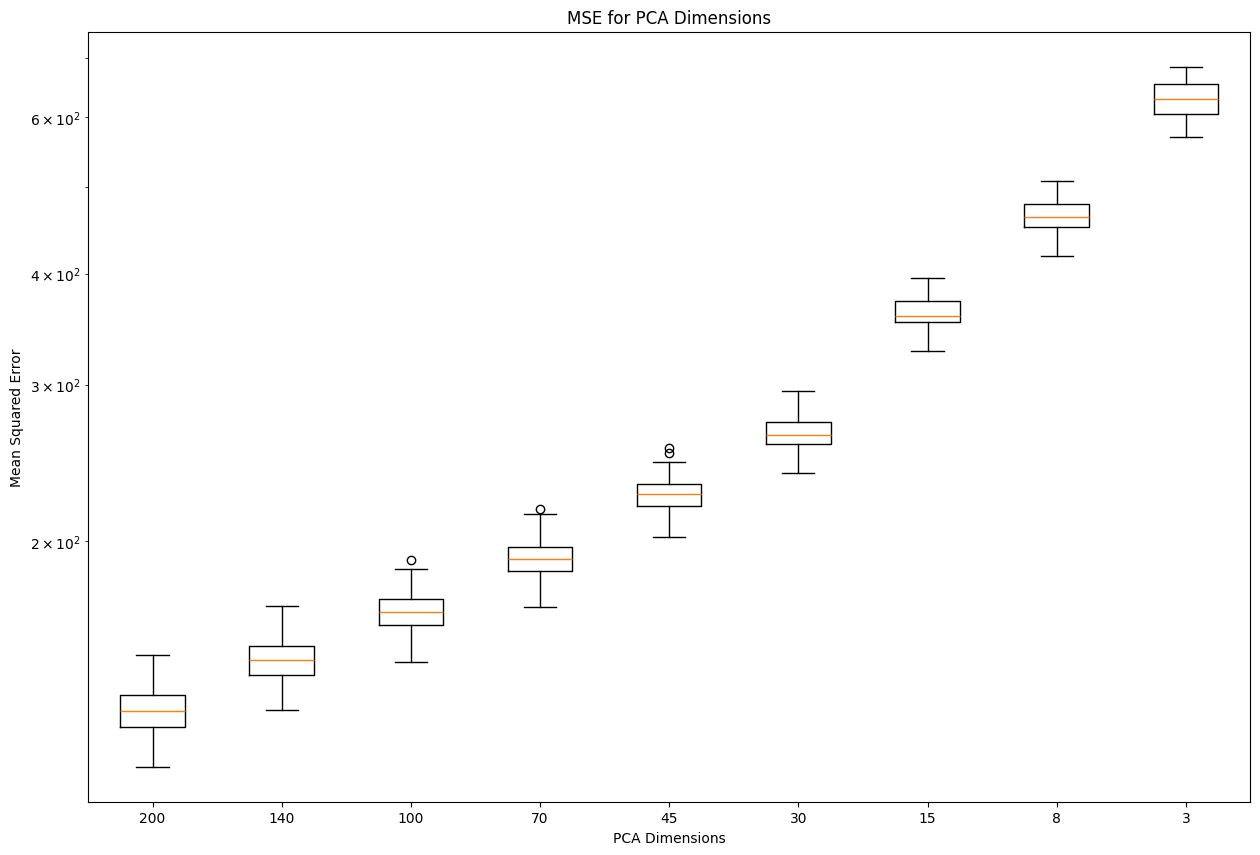

In [5]:
plt.figure(figsize=(15, 10))
plt.boxplot([mse_scores[dim] for dim in pca_dimensions], labels=[str(dim) for dim in pca_dimensions])
plt.title('MSE for PCA Dimensions')
plt.xlabel('PCA Dimensions')
plt.ylabel('Mean Squared Error')
plt.yscale('log')
plt.show()

## results
به نمودارهای مختلف که برای هر کاهش بعد رسم شده دقت کنید ۲ مساله مهم برای این نتیجه‌گیری وجود دارد اول اینکه خطای ما بیش از حد بزرگ نباشد و محل شروع افزایش خطا را پیدا کنیم که با کنار هم گذاشتن این تفاسیر به نظر میرسد در حدود ۱۰۰ بعد نتایج نسبتا خوبی داریم

Pay attention to the different plots for each decrease after drawing. There are 2 important issues for this conclusion. First, our error is not too big and we find the starting point of the error increase, which by putting these interpretations together, it seems to be around 100, we have relatively good results.

## test data
در این بخش ابعاد داده تست را به ۱۰۰ کاهش میدهیم و برش میگردانیم و خطای مربع میانگین‌ها را حساب کرده و به عنوان نتیجه برمیگردانیم

in this section we are going to reduce test data dimensions to 100 and inverse it after that we calculate the MSE error for it and return this number as our result.

In [6]:
pca = PCA(n_components=100)
pca.fit(X_train_flat)
X_test_pca = pca.transform(X_test_flat)
X_test_reconstructed = pca.inverse_transform(X_test_pca)
mse = mean_squared_error(X_test_flat, X_test_reconstructed)
print(f'The MSE between the original and reconstructed test data is: {mse}')

The MSE between the original and reconstructed test data is: 156.74241159543692


## plot_images function
در این بخش این تابع را تعریف کردم تا بتوانم داده‌ها را به آن بدهم و برایم عکس متناظرش را برگرداند

in this section I defined plot_images function so I can give it my data and it returns the actual image of those data.

In [7]:
def plot_images(images, titles, h, w, rows, cols):
    plt.figure(figsize=(12, 9))
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap='gray')
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
    plt.show()

## see the results
در نهایت ۱۰ داده اول مجموعه دادگان تست را به همراه نسخه تغییر یافته و برگشته را به تابع بالایی میدهیم تا نتایچ را ببینیم که به نظر خوب می‌آید

Finally we give our first 10 test data and transformed/inverse data to plot_image function so it can show us the result images and actually they are good enough I think.

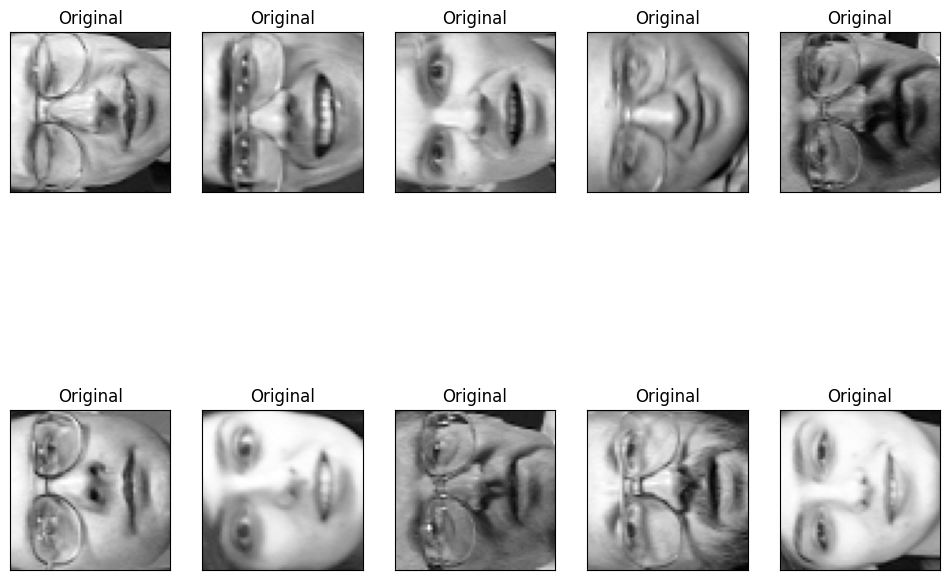

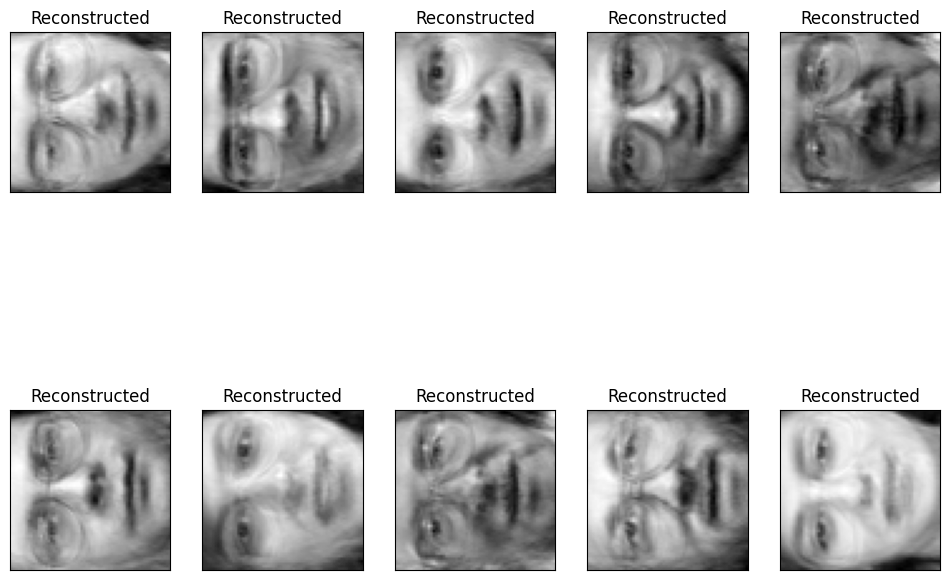

In [8]:
original_images = X_test_flat[:10]
reconstructed_images = X_test_reconstructed[:10]

plot_images(original_images, ['Original'] * 10, 64, 64, 2, 5)
plot_images(reconstructed_images, ['Reconstructed'] * 10, 64, 64, 2, 5)
